In [11]:
import typing

import tensorflow as tf
import keras

from keras import models, layers, Input
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
def plot_loss(history):
  """ Plot training, test loss. """
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show();

## Logistic Regression


In [ ]:
model = models.Sequential()
model.add(Input(shape=(4,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


In [ ]:
model.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=4, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
history = model.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)


In [ ]:
print(history.history.keys())


In [ ]:
plot_loss(history)

## Derived Features

In [ ]:
# one hidden layer of three neurons, sigmoids throughout
model_sigmoid = models.Sequential()
model_sigmoid.add(layers.InputLayer(shape=(4,)))
model_sigmoid.add(layers.Dense(3, activation='sigmoid'))
model_sigmoid.add(layers.Dense(1, activation='sigmoid'))
model_sigmoid.summary()

model_sigmoid.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history_sigmoid = model_sigmoid.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)
plot_loss(history_sigmoid)


In [ ]:
# one hidden layer of three neurons, relu in the middle
model_relu = models.Sequential()
model_relu.add(layers.InputLayer(input_shape=(4,)))
model_relu.add(layers.Dense(3, activation='relu'))
model_relu.add(layers.Dense(1, activation='sigmoid'))
model_relu.summary()

model_relu.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history_relu = model_relu.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)
plot_loss(history_relu)

## Richer Models


In [ ]:
# two hidden layers, relu activation
model_rich = models.Sequential()
model_rich.add(layers.InputLayer(input_shape=(4,)))
model_rich.add(layers.Dense(20, activation='relu'))
model_rich.add(layers.Dense(20, activation='relu'))
model_rich.add(layers.Dense(1, activation='sigmoid'))


model_rich.summary()

model_rich.compile(optimizer='SGD',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history_rich = model_rich.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)
plot_loss(history_rich)

## Multi-class


In [12]:
X,y = make_classification(
  n_samples=1000,
  n_features=4, 
  n_redundant=0, 
  n_classes=3,
  n_clusters_per_class=1
)

X_train, X_test, y_train, y_test = train_test_split(
  X, 
  y, 
  test_size=0.33, 
  random_state=42
)


In [ ]:
# three output classes; softmax is used
model_mc = models.Sequential()
model_mc.add(layers.InputLayer(input_shape=(4,)))
model_mc.add(layers.Dense(20, activation='relu'))
model_mc.add(layers.Dense(20, activation='relu'))
model_mc.add(layers.Dense(3, activation='softmax'))

model_mc.summary()

model_mc.compile(
  optimizer='SGD',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

history_mc = model_mc.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)

plot_loss(history_mc)


## Fiddling around

In [32]:
def train_model_with_layer_function(layer_to_change: keras.layers.Layer, kwargs_for_fit):
  # three output classes; softmax is used
  model = models.Sequential()
  model.add(layers.InputLayer(input_shape=(4,)))
  # model_mc_sigmoid.add(layers.Dense(20, activation='sigmoid'))
  model.add(layer_to_change)
  model.add(layers.Dense(3, activation='softmax'))
  
  model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
  )
  
  for key, value in {
    "batch_size" : 32,
    "epochs" : 400,
    "validation_split" : 0.3
  }.items():
    if key not in kwargs_for_fit:
      kwargs_for_fit[key] = value
  
  history = model.fit(
    X_train,
    y_train,
    **kwargs_for_fit
  )
  return history

def plot_multiple_histories(histories : typing.Dict, metric='loss'):
  """
  Plots the training history of multiple models on the same plot for comparison.
  
  Parameters:
    histories: List of History objects from multiple model's fit() calls.
    metric: The metric to plot ('loss', 'accuracy', etc.).
    labels: List of labels for the models. If None, defaults to 'Model 1', 'Model 2', etc.
  """
  # Check if labels are provided, otherwise generate default labels
  # if labels is None:
  #   labels = [f'Model {i+1}' for i in range(len(histories))]
  
  # Initialize the plot
  plt.figure(figsize=(10, 6))
  
  # Loop through each history and plot the metrics
  for i, (label, history) in enumerate(histories.items()):
    epochs = range(1, len(history.history[metric]) + 1)
    
    # Plot training metric
    plt.plot(epochs, history.history[metric], label=f'{label} {metric.capitalize()}')
    
    # Plot validation metric if available
    if f'val_{metric}' in history.history:
      plt.plot(epochs, history.history[f'val_{metric}'], '--', label=f'{label} Validation {metric.capitalize()}')
  
  # Add labels and title
  plt.title(f'Comparison of {metric.capitalize()} Between Models')
  plt.xlabel('Epochs')
  plt.ylabel(metric.capitalize())
  plt.legend()
  
  # Show plot
  plt.show()



Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2907 - sparse_categorical_accuracy: 0.3198 - val_loss: 1.2155 - val_sparse_categorical_accuracy: 0.3663
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2326 - sparse_categorical_accuracy: 0.3183 - val_loss: 1.1779 - val_sparse_categorical_accuracy: 0.3663
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1933 - sparse_categorical_accuracy: 0.3418 - val_loss: 1.1506 - val_sparse_categorical_accuracy: 0.3663
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1643 - sparse_categorical_accuracy: 0.3186 - val_loss: 1.1303 - val_sparse_categorical_accuracy: 0.3663
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1370 - sparse_categorical_accuracy: 0.3223 - val_loss: 1.1148 - val_sparse_categorical_accuracy: 0.3713
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1055 - sparse_categorical_accuracy: 0.3848 - val_loss: 1.1018 - val_sparse_categorical_accuracy: 0.3812
Epoch 7/4

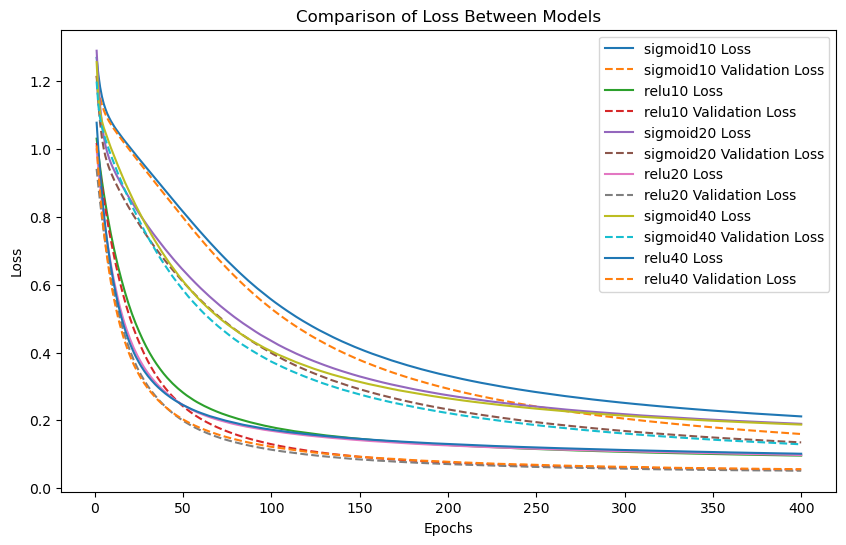

In [27]:
plot_multiple_histories(
  histories={
    "sigmoid10" : train_model_with_layer_function(layers.Dense(10, activation='sigmoid')),
    "relu10"    : train_model_with_layer_function(layers.Dense(10, activation='relu')),
    "sigmoid20" : train_model_with_layer_function(layers.Dense(20, activation='sigmoid')),
    "relu20"    : train_model_with_layer_function(layers.Dense(20, activation='relu')),
    "sigmoid40" : train_model_with_layer_function(layers.Dense(40, activation='sigmoid')),
    "relu40"    : train_model_with_layer_function(layers.Dense(40, activation='relu')),
  }
)

Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0934 - sparse_categorical_accuracy: 0.3602 - val_loss: 1.0540 - val_sparse_categorical_accuracy: 0.4208
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0227 - sparse_categorical_accuracy: 0.4841 - val_loss: 1.0044 - val_sparse_categorical_accuracy: 0.5149
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9854 - sparse_categorical_accuracy: 0.5460 - val_loss: 0.9602 - val_sparse_categorical_accuracy: 0.6040
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9305 - sparse_categorical_accuracy: 0.5880 - val_loss: 0.9204 - val_sparse_categorical_accuracy: 0.6436
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8954 - sparse_categorical_accuracy: 0.6243 - val_loss: 0.8837 - val_sparse_categorical_accuracy: 0.6634
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8571 - sparse_categorical_accuracy: 0.6728 - val_loss: 0.8508 - val_sparse_categorical_accuracy: 0.7079
Epoch 7/4

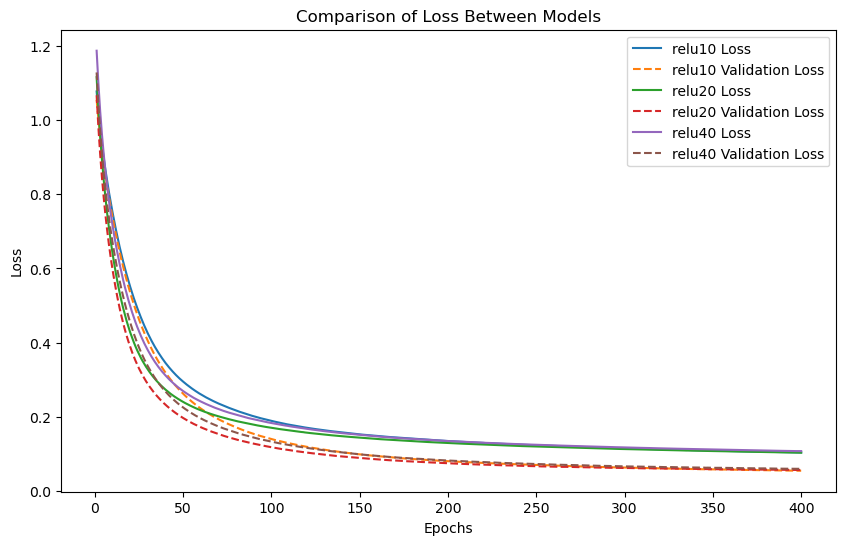

In [28]:
plot_multiple_histories(
  histories={
    # "sigmoid10" : train_model_with_layer_function(layers.Dense(10, activation='sigmoid')),
    "relu10"    : train_model_with_layer_function(layers.Dense(10, activation='relu')),
    # "sigmoid20" : train_model_with_layer_function(layers.Dense(20, activation='sigmoid')),
    "relu20"    : train_model_with_layer_function(layers.Dense(20, activation='relu')),
    # "sigmoid40" : train_model_with_layer_function(layers.Dense(40, activation='sigmoid')),
    "relu40"    : train_model_with_layer_function(layers.Dense(40, activation='relu')),
  }
)

Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.1438 - sparse_categorical_accuracy: 0.3424 - val_loss: 1.1076 - val_sparse_categorical_accuracy: 0.3317
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0789 - sparse_categorical_accuracy: 0.3686 - val_loss: 1.0743 - val_sparse_categorical_accuracy: 0.3416
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0424 - sparse_categorical_accuracy: 0.4092 - val_loss: 1.0487 - val_sparse_categorical_accuracy: 0.3861
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0614 - sparse_categorical_accuracy: 0.3990 - val_loss: 1.0279 - val_sparse_categorical_accuracy: 0.4307
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0564 - sparse_categorical_accuracy: 0.4377 - val_loss: 1.0113 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0247 - sparse_categorical_accuracy: 0.5257 - val_loss: 0.9967 - val_sparse_categorical_accuracy: 0.5495
Epoch 7/

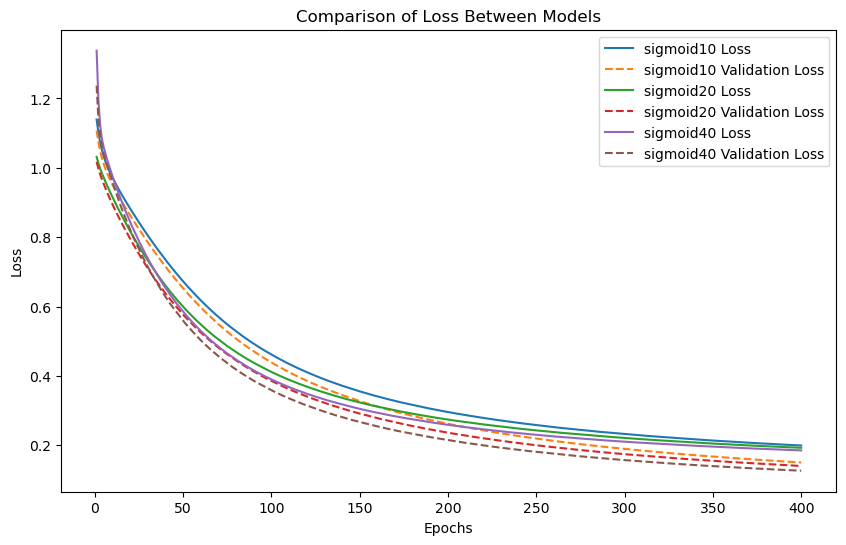

In [29]:
plot_multiple_histories(
  histories={
    "sigmoid10" : train_model_with_layer_function(layers.Dense(10, activation='sigmoid')),
    # "relu10"    : train_model_with_layer_function(layers.Dense(10, activation='relu')),
    "sigmoid20" : train_model_with_layer_function(layers.Dense(20, activation='sigmoid')),
    # "relu20"    : train_model_with_layer_function(layers.Dense(20, activation='relu')),
    "sigmoid40" : train_model_with_layer_function(layers.Dense(40, activation='sigmoid')),
    # "relu40"    : train_model_with_layer_function(layers.Dense(40, activation='relu')),
  }
)

Epoch 1/400
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7366 - sparse_categorical_accuracy: 0.7811 - val_loss: 0.2816 - val_sparse_categorical_accuracy: 0.9554
Epoch 2/400
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2708 - sparse_categorical_accuracy: 0.9477 - val_loss: 0.1687 - val_sparse_categorical_accuracy: 0.9604
Epoch 3/400
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2420 - sparse_categorical_accuracy: 0.9412 - val_loss: 0.1246 - val_sparse_categorical_accuracy: 0.9851
Epoch 4/400
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1879 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.1070 - val_sparse_categorical_accuracy: 0.9901
Epoch 5/400
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1545 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.0846 - val_sparse_categorical_accuracy: 0.9901
Epoch 6/400
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1229 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.0891 - val_sparse_categorical_accuracy: 0.990

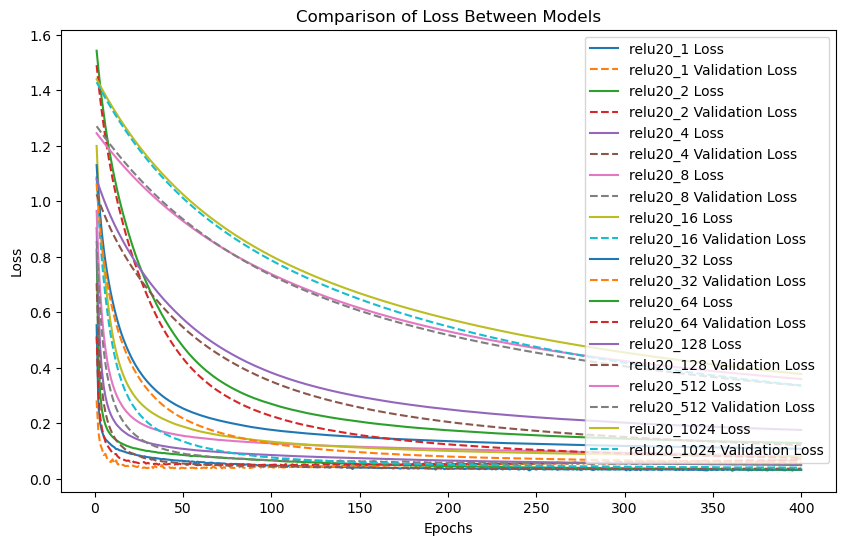

In [33]:
plot_multiple_histories(
  histories={
    "relu20_1"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 1}),
    "relu20_2"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 2}),
    "relu20_4"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 4}),
    "relu20_8"    : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 8}),
    "relu20_16"   : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 16}),
    "relu20_32"   : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 32}),
    "relu20_64"   : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 64}),
    "relu20_128"  : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 128}),
    "relu20_512"  : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 512}),
    "relu20_1024" : train_model_with_layer_function(layers.Dense(20, activation='relu'), kwargs_for_fit={"batch_size" : 1024}),
  }
)